In [ ]:
import numpy as np
import pandas as pd

In [4]:
import os
os.chdir("/Users/gunjdoshi/Documents/projects/Epileptic_Detection")


In [8]:
df=pd.read_csv("Epileptic_Seizure_Recognition.csv")
df=df.copy()
df=df.dropna()
df=df.drop("Unnamed",axis=1)


In [9]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [11]:
a=len(df['y'])

for i in range(a):
    if(df['y'][i]!=1):
        df['y'][i]="0"

df['y']
df['y'].value_counts()
        

/var/folders/y1/8g8g_m8s0w1cmz0g_ss_0zsh0000gn/T/ipykernel_96401/2729919951.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['y'][i]="0"
/var/folders/y1/8g8g_m8s0w1cmz0g_ss_0zsh0000gn/T/ipykernel_96401/2729919951.py:5: FutureWarning: S

y
0    9200
1    2300
Name: count, dtype: int64

In [12]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


<Axes: ylabel='y'>

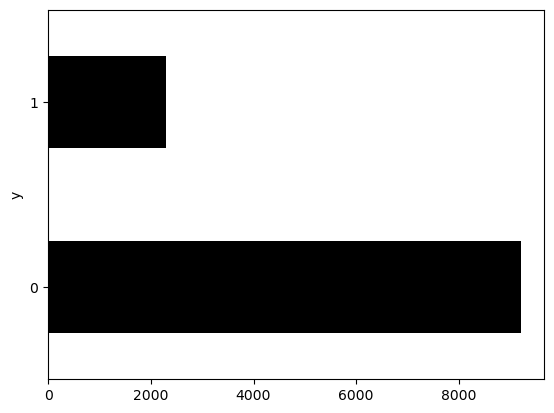

In [13]:
df["y"].value_counts().plot.barh(color='black')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 179 entries, X1 to y
dtypes: int64(178), object(1)
memory usage: 15.7+ MB


In [15]:
df.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
X1,11500.0,-11.581391,165.626284,-1839.0,-54.0,-8.0,34.0,1726.0
X2,11500.0,-10.911565,166.059609,-1838.0,-55.0,-8.0,35.0,1713.0
X3,11500.0,-10.187130,163.524317,-1835.0,-54.0,-7.0,36.0,1697.0
X4,11500.0,-9.143043,161.269041,-1845.0,-54.0,-8.0,36.0,1612.0
X5,11500.0,-8.009739,160.998007,-1791.0,-54.0,-8.0,35.0,1518.0


In [16]:
y = df['y']
X = df.drop(['y'], axis = 1)
X.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,135,190,229,223,192,125,55,-9,-33,-38,...,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
1,386,382,356,331,320,315,307,272,244,232,...,168,164,150,146,152,157,156,154,143,129
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,29,57,64,48,19,-12,-30,-35,-35,-36
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,10,4,2,-12,-32,-41,-65,-83,-89,-73


In [19]:
y.head(12)

0     0
1     1
2     0
3     0
4     0
5     0
6     0
7     0
8     1
9     0
10    0
11    1
Name: y, dtype: object

In [24]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Convert data to numeric types
# X = X.apply(pd.to_numeric, errors='coerce')  # Convert all X values to numeric
# y = pd.to_numeric(y, errors='coerce')  # Convert y to numeric

# Fit logistic regression model
loj = sm.Logit(y, X)
loj_model = loj.fit()
print(loj_model.summary())


Optimization terminated successfully.
         Current function value: 0.667113
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                11500
Model:                          Logit   Df Residuals:                    11322
Method:                           MLE   Df Model:                          177
Date:                Fri, 07 Feb 2025   Pseudo R-squ.:                 -0.3332
Time:                        21:09:43   Log-Likelihood:                -7671.8
converged:                       True   LL-Null:                       -5754.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
X1             0.0014      0.001      1.439      0.150      -0.000       0.003
X2            -0.0035      0.

In [25]:
a = len(X.columns)  # Get the number of columns in X
pvalues = []
alpha = 0.05  # Confidence interval threshold

for i in range(1, a):
    if loj_model.pvalues[i - 1] < alpha:  # Check if P-value is less than alpha
        pvalues.append(loj_model.pvalues[i - 1:i])  # Append small P-values

print(pvalues)
print(a)


[X5    0.008829
dtype: float64, X7    0.002145
dtype: float64, X9    0.009549
dtype: float64, X13    0.038445
dtype: float64, X26    0.013645
dtype: float64, X51    0.025051
dtype: float64, X72    0.032144
dtype: float64, X100    0.027183
dtype: float64, X102    0.008632
dtype: float64, X107    0.02673
dtype: float64, X108    0.04267
dtype: float64, X119    0.045717
dtype: float64, X120    0.02879
dtype: float64, X140    0.027286
dtype: float64, X157    0.009528
dtype: float64, X158    0.000178
dtype: float64]
178


/var/folders/y1/8g8g_m8s0w1cmz0g_ss_0zsh0000gn/T/ipykernel_96401/3834016845.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if loj_model.pvalues[i - 1] < alpha:  # Check if P-value is less than alpha


In [27]:
#we construct a model with stats again with p values and again we take the columns whose p values ​​are valuable
# until the number x does not change
Xsetimiz = pd.DataFrame(X,columns=['X5', 'X7', 'X9', 'X13', 'X26', 'X51', 'X72', 'X100', 'X102', 'X107', 'X108', 'X119', 'X120', 'X140', 'X157', 'X158'])
loj = sm.Logit(y, Xsetimiz)
loj_model = loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.683671
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                11500
Model:                          Logit   Df Residuals:                    11484
Method:                           MLE   Df Model:                           15
Date:                Fri, 07 Feb 2025   Pseudo R-squ.:                 -0.3662
Time:                        21:11:36   Log-Likelihood:                -7862.2
converged:                       True   LL-Null:                       -5754.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
X5         -6.096e-05      0.000     -0.229      0.819      -0.001       0.000
X7             0.0006      0.000      1.373      0.170      -0.000       0.001
X9             0.0002      0.000      0.606      0.545      -0.000       0.001
X13            0.0005      0.000      3.605      0.000       0.000       0.001
X26            0.0006      0.000      4.997      0.000       0.000       0.001
X51            0.0003      0.000      2.282      0.023    3.92e-05       0.001
X72            0.0005      0.000      4.287      0.000       0.000       0.001
X100        2.728e-07      0.000      0.001      0.999      -0.000       0.000
X102           0.0005      0.000      2.303      0.021    7.07e-05       0.001
X107          -0.0004      0.000     -0.972      0.331      -0.001       0.000
X108           0.0006      0.000      1.630      0.103      -0.000       0.001
X119          -0.0003      0.000     -0.728      0.466      -0.001       0.000
X120           0.0009      0.000      2.353      0.019       0.000       0.002
X140           0.0006      0.000      4.731      0.000       0.000       0.001
X157          -0.0003      0.000     -0.811      0.417      -0.001       0.000
X158           0.0010      0.000      2.932      0.003       0.000       0.002
==============================================================================
"""

In [30]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
df=pd.read_csv("Epileptic_Seizure_Recognition.csv")
df=df.copy()
df=df.dropna()
df=df.drop("Unnamed",axis=1)
a=len(df['y'])
for i in range(a):
  if(df['y'][i] != 1):
     df['y'][i]="0"
y = df['y']
X = df.drop(['y'], axis = 1)
#We have created the following Xset, by building the model 2 times in a row and choosing the Xs with the most valuable p value.(We built the model, we re-modeled with the ones with high p values ​​and we got the highest p values ​​again)
Xsetimiz = pd.DataFrame(X,columns=['X13', 'X26', 'X51', 'X72', 'X102', 'X120', 'X140'])
X.head()
X_train,X_test,y_train,y_test=train_test_split(Xsetimiz,y,test_size=0.30,random_state=42)

/var/folders/y1/8g8g_m8s0w1cmz0g_ss_0zsh0000gn/T/ipykernel_96401/3198515853.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['y'][i]="0"
/var/folders/y1/8g8g_m8s0w1cmz0g_ss_0zsh0000gn/T/ipykernel_96401/3198515853.py:9: FutureWarning: S

In [36]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Ensure X_train and y_train are numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')
y_train = pd.to_numeric(y_train, errors='coerce')
y_test = pd.to_numeric(y_test, errors='coerce')

# Fill NaN values if any
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())

# Train RandomForest model
rf_tuned = RandomForestClassifier(n_estimators=100, random_state=42)
rf_tuned.fit(X_train, y_train)

# Create Importance DataFrame
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_ * 100}, index=X_train.columns)

# Sort by importance in descending order
Importance = Importance.sort_values(by="Importance", ascending=False)

# Display the importance values
print(Importance)



      Importance
X26    19.475264
X13    16.986977
X102   15.506215
X72    15.487013
X51    12.004237
X140   11.043206
X120    9.497087


Text(0.5, 0, 'Importance order of variables')

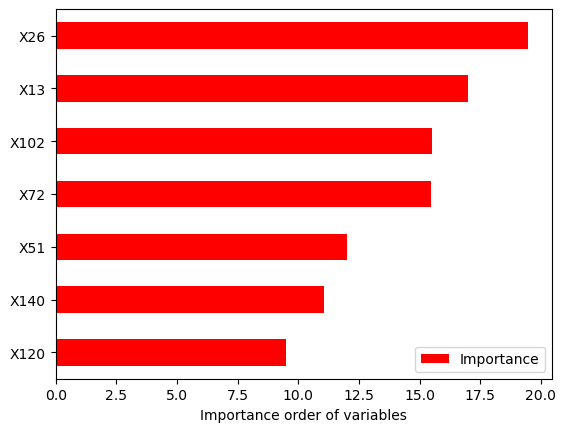

In [43]:
import matplotlib.pyplot as plt
Importance.sort_values(by = "Importance", axis =0, ascending =True).plot(kind = "barh", color ="r")
# The meaning of “barh” draws a horizontal bar plot.
plt.xlabel ("Importance order of variables")

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Initialize Decision Tree Classifier
cart = DecisionTreeClassifier(criterion='gini', random_state=42)  # Ensuring reproducibility

# Fit the model
cart_model = cart.fit(X_train, y_train)

# Print the model parameters
print(cart_model)  # Displays model details


DecisionTreeClassifier(random_state=42)


In [46]:
y_pred = cart_model.predict(X_test)

# Compute evaluation metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[2617  135]
 [ 130  568]]

Accuracy Score: 0.9231884057971015

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      2752
           1       0.81      0.81      0.81       698

    accuracy                           0.92      3450
   macro avg       0.88      0.88      0.88      3450
weighted avg       0.92      0.92      0.92      3450



In [48]:
y_pred = cart_model.predict(X_test) #yukarda default secilen parametreler ile modeli kurduk burda ise test verisini tahminletiyoruz.
accuracy_score(y_test, y_pred) #default parametrelerle kurduğumuz modelin accuracysi (genel başarısı)
0.9240579710144927
print (classification_report (y_test, y_pred)) # Other metric information of the model established with default parameters

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2752
           1       0.81      0.81      0.81       698

    accuracy                           0.92      3450
   macro avg       0.88      0.88      0.88      3450
weighted avg       0.92      0.92      0.92      3450



In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid
cart_grid = {
    "max_depth": range(1, 10),  # Vary max_depth between 1 and 10
    "min_samples_split": list(range(2, 50))  # Vary min_samples_split between 2 and 50
}

# Initialize Decision Tree Classifier
cart = DecisionTreeClassifier()

# Perform GridSearchCV
cart_cv = GridSearchCV(cart, cart_grid, cv=10, n_jobs=-1, verbose=2)

# Fit the model
cart_cv_model = cart_cv.fit(X_train, y_train)

# Print best parameters
print("Best parameters:", cart_cv_model.best_params_)


Fitting 10 folds for each of 432 candidates, totalling 4320 fits
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=3; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=3; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=3; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=4; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=4; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=6; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=6; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=6; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=8; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=8; total time=   0.0s
[CV] END ...................max_depth=1, min

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Rebuild the Decision Tree model with best parameters
cart = DecisionTreeClassifier(max_depth=9, min_samples_split=30) 
cart_tuned = cart.fit(X_train, y_train)

# Make predictions
y_pred = cart_tuned.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy
print("Model Accuracy:", accuracy)
print(classification_report(y_test,y_pred))

Model Accuracy: 0.9385507246376812
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2752
           1       0.88      0.81      0.84       698

    accuracy                           0.94      3450
   macro avg       0.91      0.89      0.90      3450
weighted avg       0.94      0.94      0.94      3450



In [52]:
pip install numpy pandas scikit-learn tensorflow keras matplotlib seaborn



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
[CV] END ...................max_depth=8, min_samples_split=5; total time=   0.0s
[CV] END ...................max_depth=8, min_samples_split=5; total time=   0.0s
[CV] END ...................max_depth=8, min_samples_split=5; total time=   0.0s
[CV] END ...................max_depth=8, min_samples_split=5; total time=   0.0s
[CV] END ...................max_depth=8, min_samples_split=5; total time=   0.0s
[CV] END ...................max_depth=8, min_samples_split=5; total time=   0.0s
[CV] END ...................max_depth=8, min_samples_split=5; total time=   0.0s
[CV] END ...................max_depth=8, min_samples_split=6; total time=   0.0s
[CV] END ...................max_depth=8, min_samples_split=6; total time=   0.0s
[CV] END ...................max_depth=8, min_samples_split=6; total time=   0.0s
[CV] END ......

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [64]:
df = pd.read_csv("Epileptic_Seizure_Recognition.csv")

df = df.drop(["Unnamed"], axis=1, errors="ignore")  
df["y"] = df["y"].apply(lambda x: 1 if x == 1 else 0) 


In [65]:
# Split Features & Target
X = df.drop(["y"], axis=1).values  
y = df["y"].values 

In [68]:
X = X.reshape(X.shape[0], X.shape[1], 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [69]:
# CNN Model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation="relu", input_shape=(X.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation="relu"),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),  # Prevent overfitting
    Dense(1, activation="sigmoid")  # Binary classification
])



/Users/gunjdoshi/anaconda3/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [70]:
model.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6627 - loss: 4.0632 - val_accuracy: 0.9117 - val_loss: 0.2289
Epoch 2/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9124 - loss: 0.2385 - val_accuracy: 0.9395 - val_loss: 0.1494
Epoch 3/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9523 - loss: 0.1331 - val_accuracy: 0.9711 - val_loss: 0.0818
Epoch 4/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9666 - loss: 0.0920 - val_accuracy: 0.9750 - val_loss: 0.0717
Epoch 5/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9665 - loss: 0.0917 - val_accuracy: 0.9791 - val_loss: 0.0570
Epoch 6/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9794 - loss: 0.0548 - val_accuracy: 0.9819 - val_loss: 0.0562
Epoch 7/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9775 - loss: 0.0599 - val_accuracy: 0.9739 - val_loss: 0.0625
Epoch 8/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9807 - loss: 0.0577 - val_accuracy: 0.

In [71]:
loss, accuracy = model.evaluate(X_test, y_test)
y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Convert probabilities to binary predictions


90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9863 - loss: 0.0428
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [73]:

r2 = r2_score(y_test, y_pred)

print(" Test Accuracy:", accuracy)
print(" R² Score:", r2)
print(" Classification Report:\n", classification_report(y_test, y_pred))


 Test Accuracy: 0.9860869646072388
 R² Score: 0.9130434782608696
 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2300
           1       0.97      0.96      0.97       575

    accuracy                           0.99      2875
   macro avg       0.98      0.98      0.98      2875
weighted avg       0.99      0.99      0.99      2875



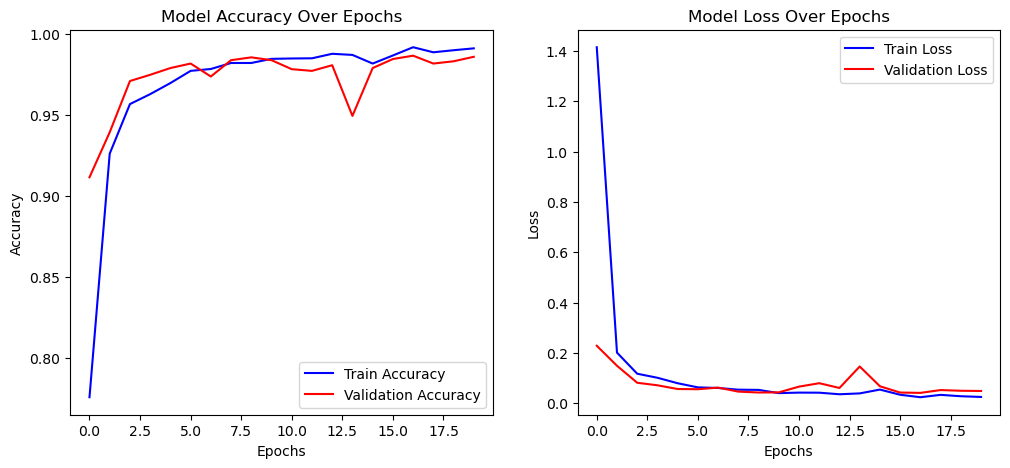

In [75]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy", color="blue")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy", color="red")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Over Epochs")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss", color="blue")
plt.plot(history.history["val_loss"], label="Validation Loss", color="red")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Loss Over Epochs")
plt.legend()

plt.show()